## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/Vaidehee/nu-chi-data-pt-02-2021-u-c-master 3/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/Vaidehee/nu-chi-data-pt-02-2021-u-c-master 3/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")
combined_df = combined_df.sort_values(["Timepoint", "Metastatic Sites"])
combined_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
10,f932,Ketapril,Male,15,29,0,45.000000,0
11,g107,Ketapril,Female,2,29,0,45.000000,0
19,a457,Ketapril,Female,11,30,0,45.000000,0
22,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1257,t718,Placebo,Female,10,30,45,63.423695,4
1374,y769,Ceftamin,Female,6,27,45,68.594745,4
1508,t198,Propriva,Male,22,26,45,64.911363,4
1603,v991,Propriva,Female,10,30,45,70.167749,4


In [11]:
# Checking the number of mice.
number_of_mice = combined_df["Mouse ID"].count()
number_of_mice


1893

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
861,g989,Propriva,Female,21,26,0,45.000000,0
863,g989,Propriva,Female,21,26,5,47.570392,0
865,g989,Propriva,Female,21,26,10,49.880528,0
866,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID'])]
all_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
861,g989,Propriva,Female,21,26,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
12,g107,Ketapril,Female,2,29,5,48.791665,0
20,a457,Ketapril,Female,11,30,5,47.462891,0
32,h246,Ketapril,Male,13,30,5,49.470417,0
...,...,...,...,...,...,...,...,...
1257,t718,Placebo,Female,10,30,45,63.423695,4
1374,y769,Ceftamin,Female,6,27,45,68.594745,4
1508,t198,Propriva,Male,22,26,45,64.911363,4
1603,v991,Propriva,Female,10,30,45,70.167749,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates("Mouse ID")
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
10,f932,Ketapril,Male,15,29,0,45.0,0
11,g107,Ketapril,Female,2,29,0,45.0,0
19,a457,Ketapril,Female,11,30,0,45.0,0
22,c819,Ketapril,Male,21,25,0,45.0,0
...,...,...,...,...,...,...,...,...
1848,t565,Capomulin,Female,20,17,0,45.0,0
1858,i557,Capomulin,Female,1,24,0,45.0,0
1868,m957,Capomulin,Female,3,19,0,45.0,0
1878,f966,Capomulin,Male,16,17,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = cleaned_df["Mouse ID"].count()
number_of_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stat_df = pd.DataFrame({"Mean Tumor Volume": mean, 
                                "Median Tumor Volume": median, 
                                "Tumor Volume Variance": variance, 
                                "Tumor Volume Std. Dev.": standard_deviation,
                                "Tumor Volume Std. Err.": sem})
summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = combined_df.groupby('Drug Regimen')
summary_stat_df_2 = single_group_by.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_stat_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Mice Per Treatment')

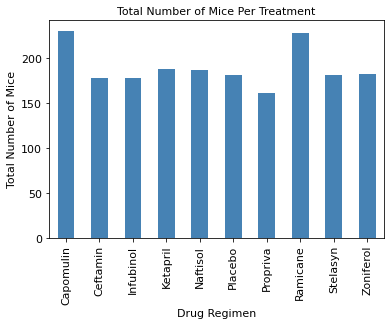

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_mice_per_treatment = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = total_mice_per_treatment.plot.bar(figsize= (6,4), color='steelblue', fontsize =11)
total_mice_per_treatment

plt.xlabel("Drug Regimen", fontsize =11)
plt.ylabel("Total Number of Mice", fontsize =11)
plt.title("Total Number of Mice Per Treatment", fontsize =11)

Text(0, 0.5, 'Total Number of Mice')

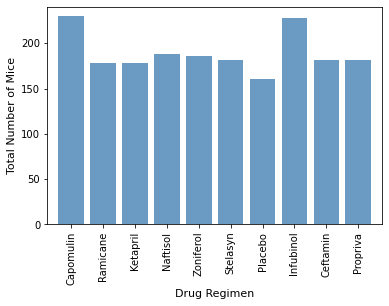

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_regimen_list = combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()
drug_regimen_list

x_axis = np.arange(len(total_mice_per_treatment))
fig1, ax1 = plt.subplots(figsize=(6,4))
plt.bar(x_axis, drug_regimen_list, color='steelblue', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'], rotation = 'vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(drug_regimen_list)+10)

plt.xlabel("Drug Regimen", fontsize=11)
plt.ylabel("Total Number of Mice", fontsize=11)




Text(0, 0.5, 'Sex')

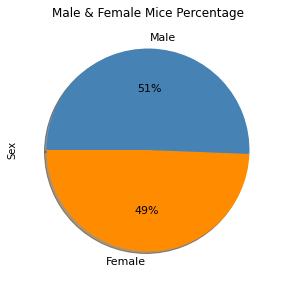

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

gender_df = gender_df[["Mouse ID","Sex"]]
gender_df.head()

plt.figure(figsize=(10,8))
ax1 = plt.subplot(121, aspect="equal")
colors = ['darkorange', 'steelblue']
gender_df.plot(kind="pie", y = "Mouse ID", colors = colors, ax=ax1, autopct='%1.00f%%',
              startangle=180, shadow=True,labels=gender_df["Sex"], legend = False, fontsize=11)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel('Sex')

(-1.1002172082078998,
 1.1045613723658971,
 -1.105172849624489,
 1.1027130801595115)

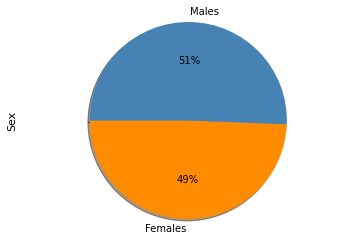

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender_count = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()
mouse_gender_count
colors = ["darkorange","steelblue"]
labels = ["Females", "Males"]


plt.pie(mouse_gender_count, labels=labels, colors=colors, autopct="%1.0f%%", shadow=True, startangle=180)
plt.ylabel('Sex',fontsize=11)
plt.axis("equal")

In [ ]:
#Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#I calculated the tumor volume for each treatment separately for each exercise

combined_df.head()

capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]

ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane",:]

infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol",:]

ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin",:]

capomulin_df.head()

ramicane_df.head()

infubinol_df.head()

ceftamin_df.head()


# Start by getting the last (greatest) timepoint for each mouse

capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']

ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']

infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']

ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_last_vol = pd.DataFrame(capomulin_last)
merge_capomulin = pd.merge(capomulin_last_vol, combined_df, on=("Mouse ID", "Timepoint"),how="left")
merge_capomulin.head()

ramicane_last_vol = pd.DataFrame(ramicane_last)
merge_ramicane = pd.merge(ramicane_last_vol, combined_df, on=("Mouse ID", "Timepoint"),how="left")
merge_ramicane.head()

infubinol_last_vol = pd.DataFrame(infubinol_last)
merge_infubinol = pd.merge(infubinol_last_vol, combined_df, on=("Mouse ID", "Timepoint"),how="left")
merge_infubinol.head()

ceftamin_last_vol = pd.DataFrame(ceftamin_last)
merge_ceftamin = pd.merge(ceftamin_last_vol, combined_df, on=("Mouse ID", "Timepoint"),how="left")
merge_ceftamin.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # If the data is in a dataframe, we use pandas to give quartile calculations
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
cap_tumors = merge_capomulin["Tumor Volume (mm3)"]

quartiles = cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of cap_tumors is: {lowerq}")
print(f"The upper quartile of cap_tumors is: {upperq}")
print(f"The interquartile range of cap_tumors is: {iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

ram_tumors = merge_ramicane["Tumor Volume (mm3)"]

quartiles = ram_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of ram_tumors is: {lowerq}")
print(f"The upper quartile of ram_tumors is: {upperq}")
print(f"The interquartile range of ram_tumors is: {iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

inf_tumors = merge_infubinol["Tumor Volume (mm3)"]

quartiles = inf_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of inf_tumors is: {lowerq}")
print(f"The upper quartile of inf_tumors is: {upperq}")
print(f"The interquartile range of inf_tumors is: {iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

ceft_tumors = merge_ceftamin["Tumor Volume (mm3)"]

quartiles = ceft_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of ceft_tumors is: {lowerq}")
print(f"The upper quartile of ceft_tumors is: {upperq}")
print(f"The interquartile range of ceft_tumors is: {iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of cap_tumors is: 32.37735684
The upper quartile of cap_tumors is: 40.1592203
The interquartile range of cap_tumors is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of ram_tumors is: 31.56046955
The upper quartile of ram_tumors is: 40.65900627
The interquartile range of ram_tumors is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of inf_tumors is: 54.04860769
The upper quartile of inf_tumors is: 65.52574285
The interquartile range of inf_tumors is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of ceft_tumors is: 48.72207785
The upper quartile of ceft_tumors is: 64.29983003
The interquartile range of ceft_tumors is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829

{'whiskers': [<matplotlib.lines.Line2D at 0x7f94b0ad97c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94b0ad9e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f94b0ad9460>,
 'medians': [<matplotlib.lines.Line2D at 0x7f94b0ae0580>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f94b0ae08e0>,
 'means': []}

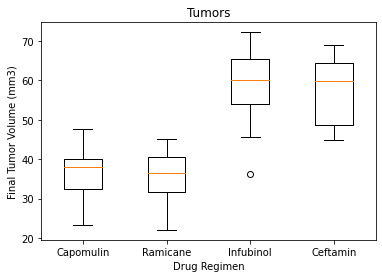

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_format = dict(marker='o', markerfacecolor='r', markersize=6, markeredgecolor='black')
box_plot = [cap_tumors, ram_tumors, inf_tumors, ceft_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(box_plot, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


## Line and Scatter Plots

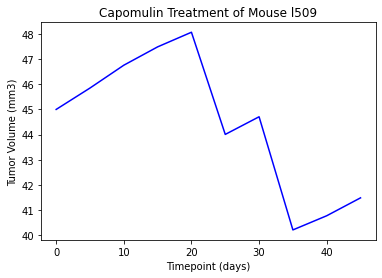

In [175]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin'].head()

mouse = combined_df.loc[combined_df['Mouse ID'] == 'l509']


#Plot line chart
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], color = 'b')

# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

# Display plot
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

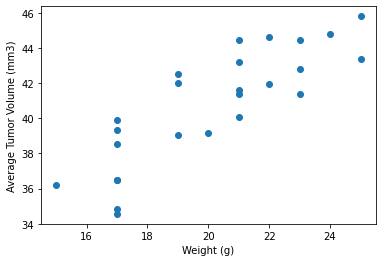

In [186]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_average_volume = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_average_volume['Weight (g)'],capomulin_average_volume['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [3]:
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
capomulin_df

#Find Average Tumor volume for each mouse
average_tumor_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())

average_tumor_volume_df = pd.merge(capomulin_df, average_tumor_volume_df, on='Mouse ID')
final_average_volume_df = average_tumor_volume_df[['Weight (g)', 'Average_Tumor_Volume']]
final_average_volume_df

x_data = final_average_volume_df['Weight (g)']
y_data = final_average_volume_df['average_tumor_volume']


correlation_coefficient = st.pearsonr(x_data, y_data)

# Print the answer to above calculation
print(f'The correlation between mouse weight and average tumor volume for Capomulin regimen is ')


KeyError: "['Average_Tumor_Volume'] not in index"